In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
path = "/home/anna/msc_oppgave/fish-forecast/Data/winter_11to24_256px/bio/GAT/2011-06-01_2024-11-21.nc"
path = "/home/anna/msc_oppgave/fish-forecast/Data/winter_11to24_256px/bio/GAT/2011-06-01_2024-11-21_normal.nc"
path = "/home/anna/msc_oppgave/fish-forecast/Data/winter_11to24_256px/bio/normalized/2011-06-01_2024-11-21.nc"
ds = xr.open_dataset(path)
ds

<xarray.Dataset> Size: 3GB
Dimensions:    (time: 1470, depth: 1, latitude: 256, longitude: 256)
Coordinates:
  * depth      (depth) float32 4B 3.0
  * time       (time) datetime64[ns] 12kB 2011-06-01 2011-06-08 ... 2024-11-21
  * latitude   (latitude) float32 1kB 56.0 56.08 56.17 ... 77.08 77.17 77.25
  * longitude  (longitude) float32 1kB -3.167 -3.083 -3.0 ... 17.92 18.0 18.08
Data variables:
    chl        (time, depth, latitude, longitude) float32 385MB ...
    kd         (time, depth, latitude, longitude) float32 385MB ...
    no3        (time, depth, latitude, longitude) float32 385MB ...
    nppv       (time, depth, latitude, longitude) float32 385MB ...
    o2         (time, depth, latitude, longitude) float32 385MB ...
    phyc       (time, depth, latitude, longitude) float32 385MB ...
    po4        (time, depth, latitude, longitude) float32 385MB ...
    si         (time, depth, latitude, longitude) float32 385MB ...
    zooc       (time, depth, latitude, longitude) float32 385MB ...
Attributes:
    regrid_method:  bilinear

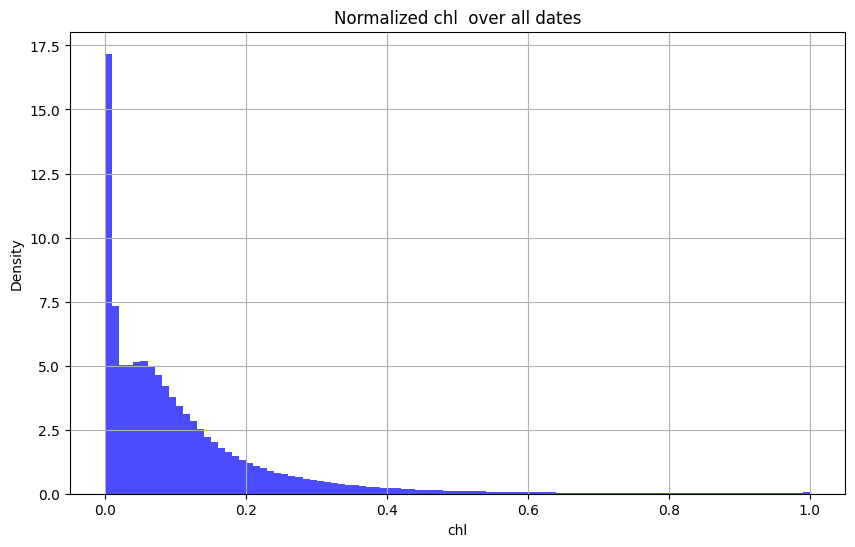

In [5]:
from matplotlib import pyplot as plt


vars = list(ds.data_vars)
vars = vars[:1]  # limit to first 10 variables for clarity
depths = ds.depth.values

# unravel the data array
for var in vars:
    da = ds[var].values.ravel()
    da = da[np.isfinite(da)]   # filters out NaN and ±inf
    if da.size > 0:

        plt.figure(figsize=(10, 6))
        plt.hist(da, bins=100, density=True, alpha=0.7, color='blue')
        plt.title(f"Normalized {var}  over all dates")
        plt.xlabel(var)
        plt.ylabel("Density")
        plt.grid()
        plt.show()

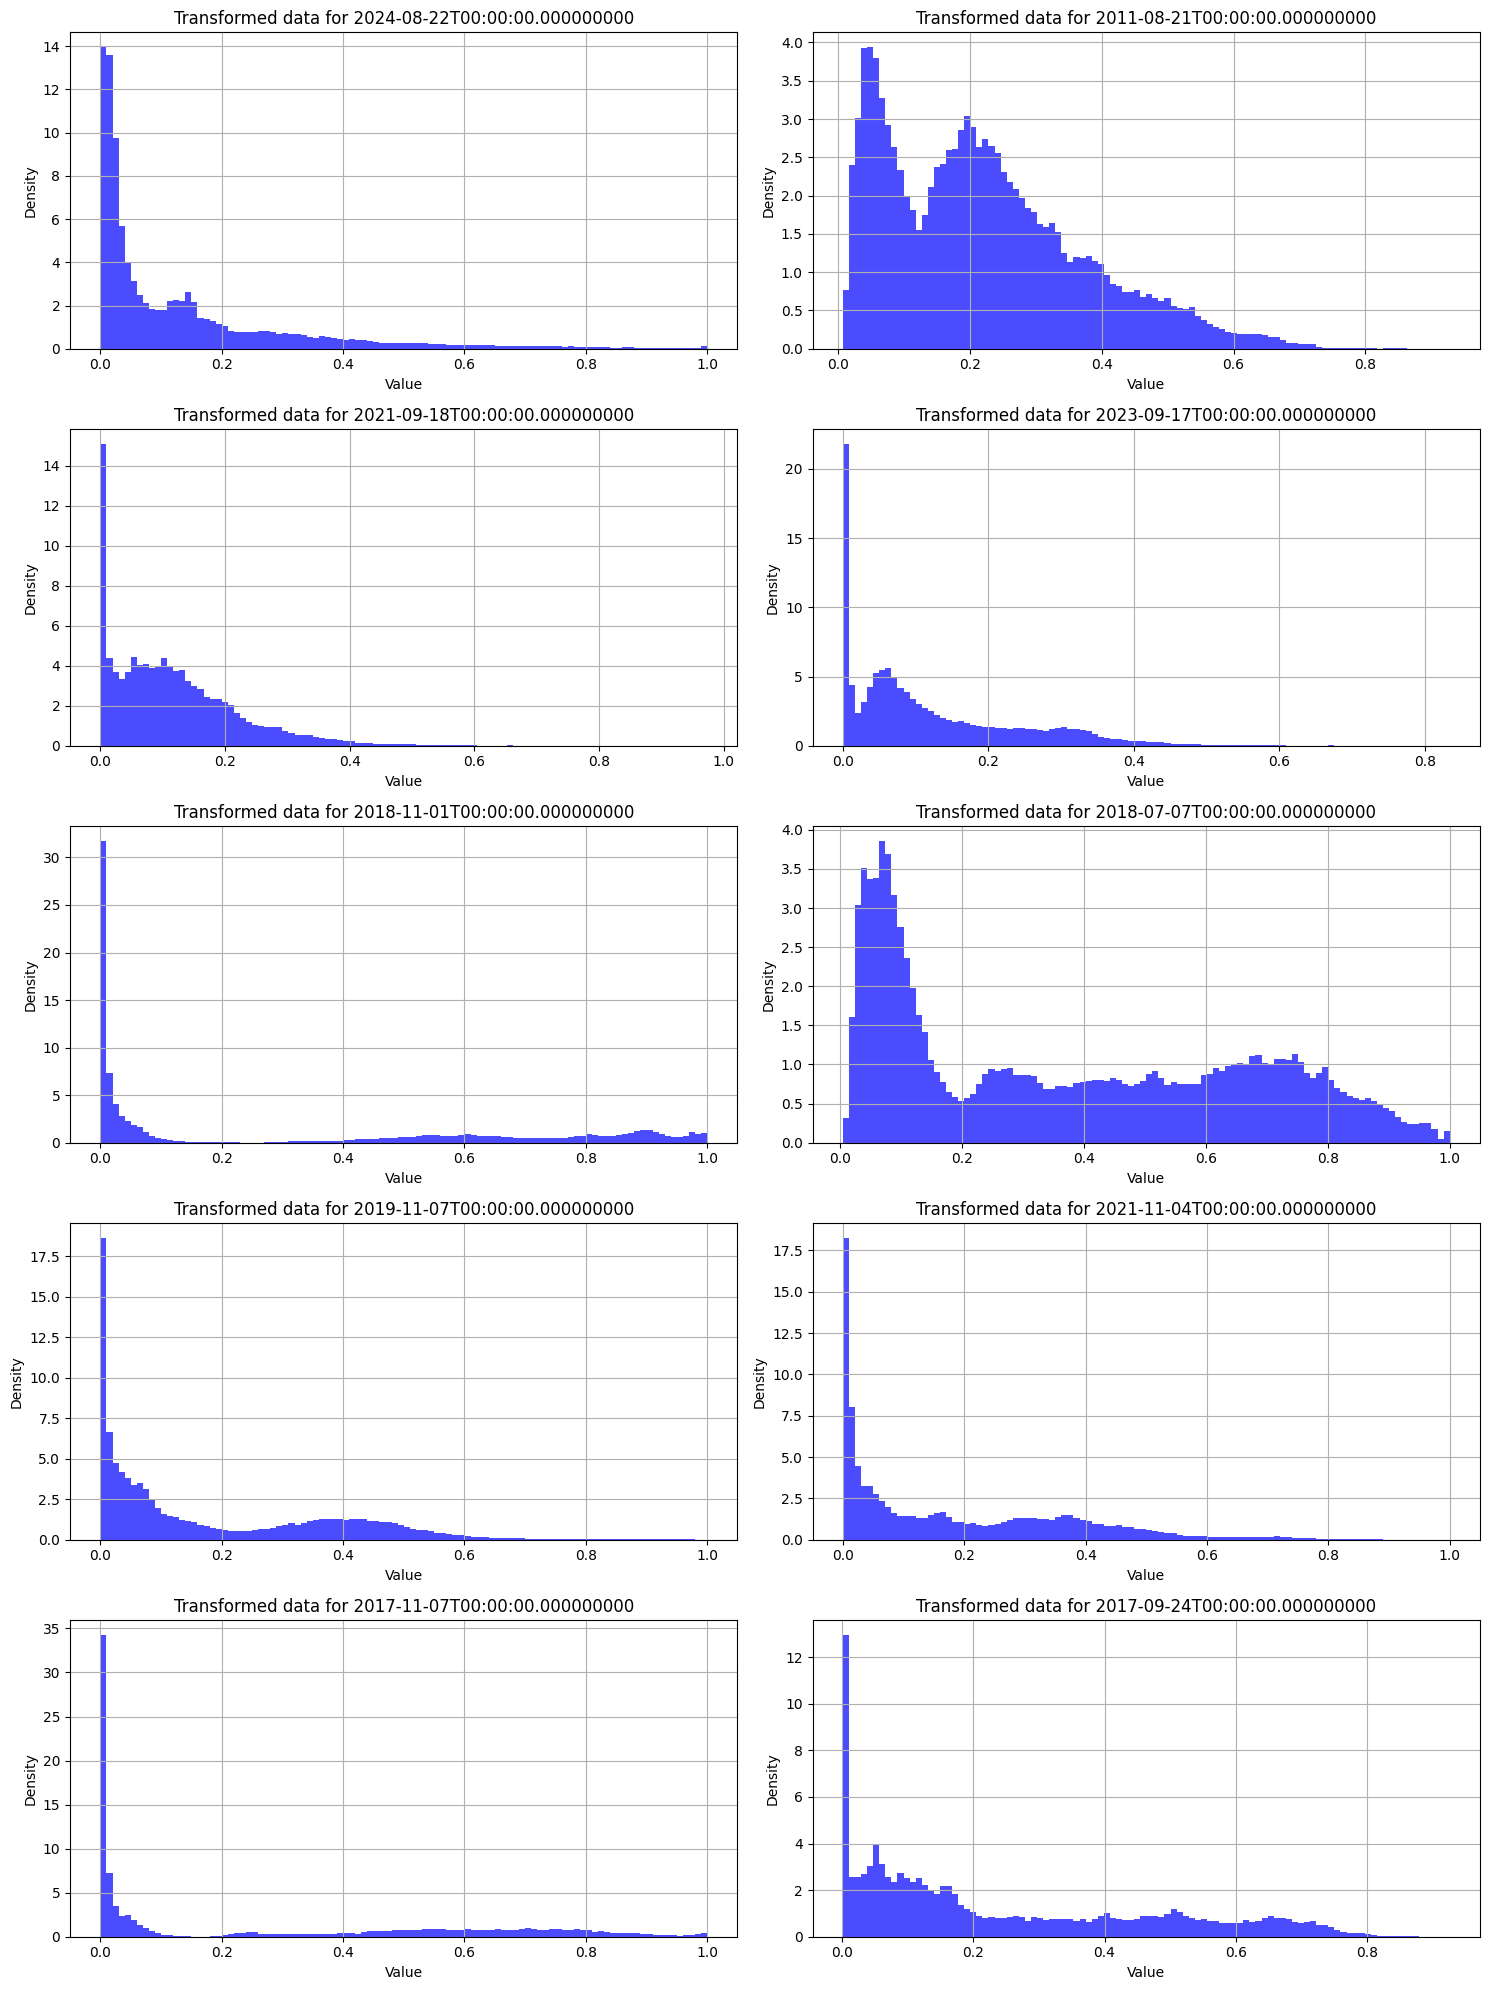

In [4]:
# show the distribution of the data for 10 random dates

# find 10 random dates
dates = ds.time.values
# random_dates = random.sample(list(dates), 10)
''' use dates:
2024-08-22T00:00:00.000000000
2011-08-21T00:00:00.000000000
2021-09-18T00:00:00.000000000
2023-09-17T00:00:00.000000000
2018-11-01T00:00:00.000000000
2018-07-07T00:00:00.000000000
2019-11-07T00:00:00.000000000
2021-11-04T00:00:00.000000000
2017-11-07T00:00:00.000000000
201-09-24T00:00:00.000000000
''' 
random_dates = [
    "2024-08-22T00:00:00.000000000",
    "2011-08-21T00:00:00.000000000",
    "2021-09-18T00:00:00.000000000",
    "2023-09-17T00:00:00.000000000",
    "2018-11-01T00:00:00.000000000",
    "2018-07-07T00:00:00.000000000",
    "2019-11-07T00:00:00.000000000",
    "2021-11-04T00:00:00.000000000",
    "2017-11-07T00:00:00.000000000",
    "2017-09-24T00:00:00.000000000",
]

# start plotting plots 5 rows and 2 columns
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)

for i, date in enumerate(random_dates):
    da = ds.sel(time=date, depth=depths[0]).to_array(dim="variable").values.ravel()
    da = da[np.isfinite(da)]   # filters out NaN and ±inf
    if da.size > 0:
        plt.subplot(5, 2, i + 1)
        plt.hist(da, bins=100, density=True, alpha=0.7, color='blue')
        plt.title(f"Transformed data for {date}")
        plt.xlabel("Value")
        plt.ylabel("Density")
        plt.grid()

        plt.tight_layout()
plt.show()